In [1]:
## popular python packages
import numpy as np
import matplotlib.pyplot as plt
from dask_quantumtinkerer import Cluster, cluster_options
from dask.distributed import wait, as_completed
import tinyarray as ta
from itertools import product

# packages used here
import kwant

import sys, os

# pre-defined functions
sys.path.append(os.path.realpath('./../code/'))
from optimization import Optimize, hamiltonian, optimize_phase_fn, optimize_gate_fn
import parameters
from constants import scale, majorana_pair_indices
from utils import voltage_dict, eigsh, svd_transformation

sys.path.append(os.path.realpath('./../spin-qubit/'))

VoronoiMesh version 0.1
DiscretePoisson version 0.3
Shape version: 0.1
SystEquations version: 0.3
Solver version 0.1


In [2]:
options = cluster_options()
options.worker_cores = 2
options.worker_memory = 15
options.extra_path = "/home/srangaswamykup/trijunction_design/code/"
cluster_dashboard_link = "http://io.quantumtinkerer.tudelft.nl/user/srangaswamykup/proxy/"

In [3]:
error = []
for seq in sequence:
    try:
        parallel.parameter_tuning(seq)
    except AssertionError:
        error.append(seq)
        pass

NameError: name 'sequence' is not defined

In [ ]:
dielectric_thickness = [0.5, 1, 1.5, 2.0, 2.5, 3.0]
gate_separation = [7, 9, 11, 13, 15]

SAVE_AT = "/home/tinkerer/trijunction-design/data/results/"

sequence = np.array(list(product(dielectric_thickness, gate_separation)))

with Cluster(options) as cluster:
    cluster.scale(n=len(sequence))
    client = cluster.get_client()
    print(cluster_dashboard_link + cluster.dashboard_link[17:])
    # results = []
    futures = client.map(parameter_tuning, sequence)
    result = client.gather(futures, errors = 'skip')
    filename = SAVE_AT + "result.pkl"
    # with open(filename, "wb") as outfile:
    #     pickle.dump(result, outfile)
    # wait(futures)
#     for future, result in as_completed(futures, with_results=True):
#         if future.status == "error":
#             print("Error!")
#             results.append("E")
#         else:
#             results.append(result)
#             filename = SAVE_AT + str(thickness) + "_" + str(gap) + "_" + ".pkl"
#             with open(filename, "wb") as outfile:
#                 pickle.dump(results[-1], outfile)
                

In [2]:
import json
with open("/home/tinkerer/trijunction-design/code/config.json", "r") as outfile:
    config = json.load(outfile)

In [3]:
optimize = Optimize(
    config, poisson_system=[], linear_problem=[], boundaries=[], scale=scale
)

# thickness, gap = newconfig

change_config = [
    {"device": {"thickness": {"dielectric": 3.0}}},
    {"gate": {"channel_width": 7}},
]

_, boundaries, poisson_system, linear_problem = optimize.changeconfig(change_config)

Finding closed voronoi cells
Done selecting closed voronoi cells
Calculating points distance
Done
Calculating ridges hypersurfaces
Done
Finding  hypervolume for closed voronoi cells
Done finding hypervolume for closed voronoi cells
Done calculating surface
Done calculating distance
Done calculating capacitance matrix
Finding linear part of the tight-binding Hamiltonian


100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


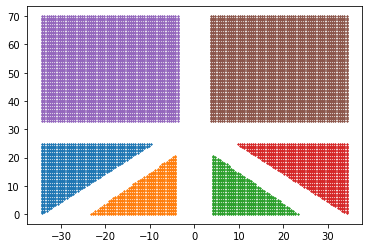

In [4]:
for name, indices in optimize.voltage_regions.items():
    if name.split('_')[0] != 'global':
        grid_to_plot = optimize.grid_points[indices][:, [0, 1]]
        plt.scatter(grid_to_plot[:, 0], grid_to_plot[:, 1], s=0.5)

In [5]:
from potential import gate_potential
pot = gate_potential(
    optimize.poisson_system,
    optimize.linear_problem,
    optimize.site_coords[:, [0, 1]],
    optimize.site_indices,
    optimize.voltages,
    {},
    offset=optimize.offset[[0, 1]],
)

mu = parameters.bands[0]
params = parameters.junction_parameters(m_nw=[mu, mu, mu])
params.update(potential=pot)

f_mu = optimize.f_params(**params)["mu"]

def diff_f_mu(x, y):
    return f_mu(x, y) - f_mu(-x, y)

kwant_sites = np.array(list(site.pos for site in optimize.trijunction.sites))

to_check = [diff_f_mu(*site) for site in kwant_sites]

In [6]:
coords = np.array([site.pos for site in optimize.trijunction.sites])/scale

In [7]:
pot_coords = np.array(list(pot.keys()))

(-50.0, 100.0)

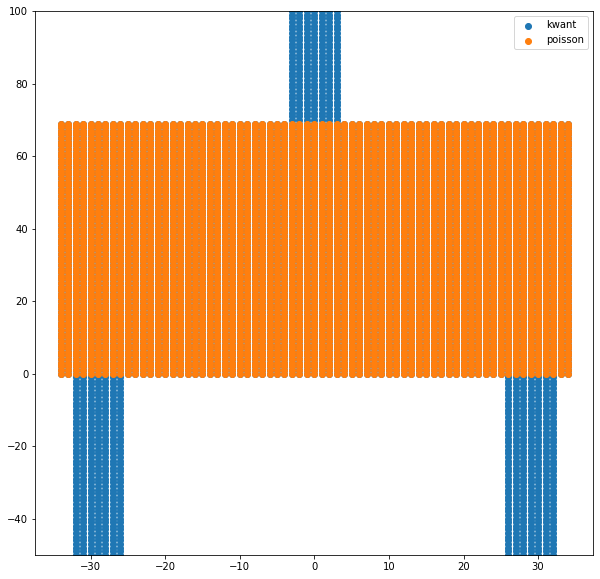

In [8]:
plt.figure(figsize = (10, 10))
plt.scatter(coords[:, 0], coords[:, 1], label = 'kwant')
plt.scatter(pot_coords[:, 0], pot_coords[:, 1], label = 'poisson')
plt.legend()
plt.ylim(-50, 100)

In [10]:
optimize.nw_centers

OrderedDict([('left', array([-28.99,   0.  ])),
             ('right', array([28.99, -0.  ])),
             ('top', array([  0.  , 219.99]))])

left_1 -34.245 -9.744999999999997
left_2 -23.244999999999997 -4.244999999999997
right_1 4.244999999999999 23.244999999999997
right_2 9.745 34.245
top_1 -34.245 -3.7449999999999974
top_2 3.7449999999999974 34.245


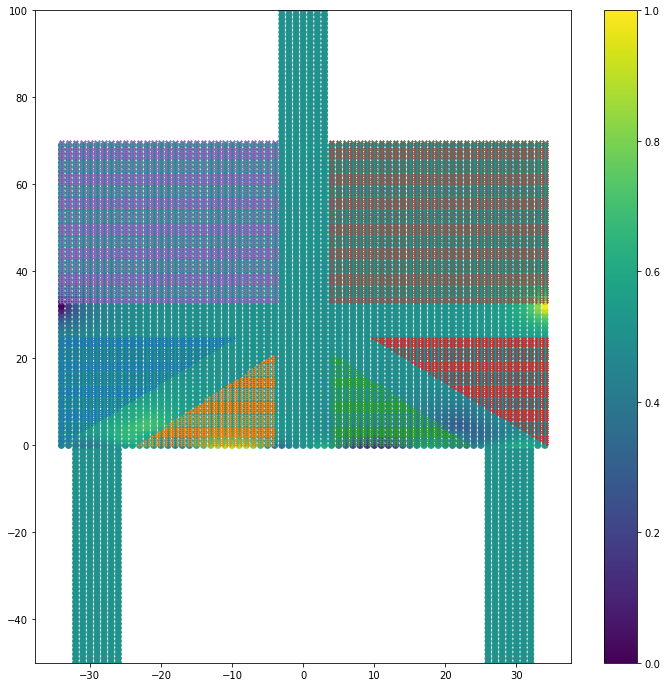

In [18]:
plt.figure(figsize = (12, 12))
plt.scatter(coords[:, 0], coords[:, 1], c = to_check)
for name, indices in optimize.voltage_regions.items():
    if name.split('_')[0] != 'global':
        grid_to_plot = optimize.grid_points[indices][:, [0, 1]]
        plt.scatter(grid_to_plot[:, 0], grid_to_plot[:, 1], s=0.5)
        print(name, min(grid_to_plot[:, 0]), max(grid_to_plot[:, 0]))
plt.ylim(-50, 100)
plt.colorbar()

In [19]:
pot_coords

array([[-34.,   0.],
       [-34.,   1.],
       [-34.,   2.],
       ...,
       [ 34.,  67.],
       [ 34.,  68.],
       [ 34.,  69.]])

In [24]:
grid  = optimize.poisson_system.grid.points

In [25]:
d2 = grid[optimize.poisson_system.regions.voltage.tag_points['dirichlet_2']]
d3 = grid[optimize.poisson_system.regions.voltage.tag_points['dirichlet_3']]

In [10]:
from shapely.geometry import Polygon

# Y-shaped geometry

#### Parameters

In [4]:
import json
filename = 'config.json'
saveat = os.path.join(ROOT_DIR, 'code/')
with open(saveat + filename , 'r') as outfile:
    config = json.load(outfile)

In [5]:
dielectric_thickness = [0.5, 1, 1.5, 2.0]
gate_separation = [7, 9, 11, 13, 15]

In [8]:
optimize = Optimize(config, 
                    poisson_system = [],
                    linear_problem = [],
                    boundaries = [],
                    scale = scale
                   )

In [9]:
%%time
_, boundaries, poisson_system, linear_problem = optimize.changeconfig([])

Finding closed voronoi cells
Done selecting closed voronoi cells
Calculating points distance
Done
Calculating ridges hypersurfaces
Done
Finding  hypervolume for closed voronoi cells
Done finding hypervolume for closed voronoi cells
Done calculating surface
Done calculating distance
Done calculating capacitance matrix
Finding linear part of the tight-binding Hamiltonian


100%|██████████| 13/13 [00:09<00:00,  1.44it/s]


CPU times: user 1min 30s, sys: 4.41 s, total: 1min 34s
Wall time: 1min 34s


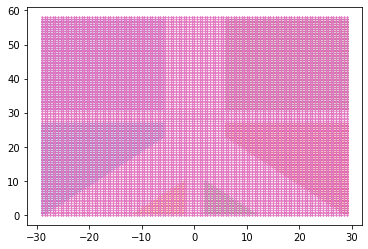

In [10]:
optimize.plot('GATES')

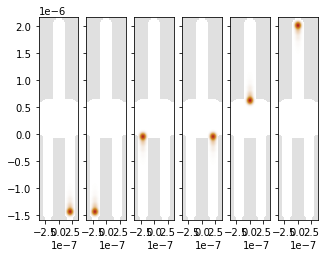

In [12]:
optimize.plot('WANNIER_FUNCTIONS')

In [13]:
optimize.set_voltages([-3.5e-3, -3.5e-3, -3.5e-3, -3.5e-3, -3.5e-3, -3.5e-3, 3e-3])

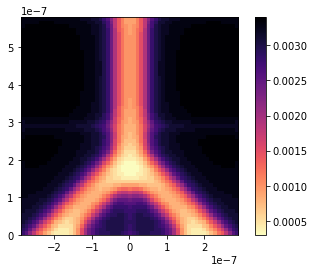

In [14]:
optimize.plot('POTENTIAL')

In [30]:
from collections import OrderedDict
pairs = ['right-top', 'left-top', 'left-right']
voltages = OrderedDict()
initial_condition = OrderedDict()
for i, pair in enumerate(pairs):
    initial = [-1.5e-3, -1.5e-3, -1.5e-3, 3e-3]
    initial[i] = -3.5e-3
    voltages[pair] = voltage_dict(initial, True)
    initial_condition[pair] = initial.copy()

In [31]:
poisson_params = {'poisson_system': poisson_system,
                  'linear_problem': linear_problem,
                  'site_coords': optimize.site_coords,
                  'site_indices': optimize.site_indices,
                  'offset': optimize.offset
                 }
params = parameters.junction_parameters(m_nw=parameters.bands[0] * np.ones(3))

kwant_params = {'kwant_sys': optimize.trijunction,
                'kwant_params_fn': optimize.f_params,
                'general_params': params,
                'linear_terms': optimize.optimizer_args['linear_terms']}

In [32]:
zero_potential = dict(zip(ta.array(optimize.site_coords[:, [0, 1]]), np.zeros(len(optimize.site_coords))))

kwant_params['general_params'].update(potential=zero_potential)

In [33]:
def wave_functions_coupling(pair, 
                      optimal_phase, 
                      voltages, 
                      kwant_system, 
                      kwant_params, 
                      kwant_params_fn, 
                      linear_terms, 
                      mlwf,
                      energy_scale):
   
    kwant_params.update(optimal_phase)
    
    if not isinstance(voltages, dict): 
        voltages = voltage_dict(voltages, True)

    params = {**kwant_params, **linear_terms}
    
    
    numerical_hamiltonian = hamiltonian(kwant_system, 
                                        voltages, 
                                        kwant_params_fn, 
                                        **params
                                       )
    
    energies, wave_functions = eigsh(
        numerical_hamiltonian.tocsc(),
        6,
        sigma=0,
        return_eigenvectors=True
    )
    
    pair_indices = majorana_pair_indices[pair].copy()
    pair_indices.append(list(set(range(3)) - set(pair_indices))[0])
    shuffle = pair_indices + [-3, -2, -1]
    desired_order = np.array(list(range(2, 5)) + list(range(2)) + [5])[shuffle]
    
    
    reference_wave_functions = mlwf[desired_order]
    
    transformed_hamiltonian = svd_transformation(
        energies,
        wave_functions,
        reference_wave_functions
    )/energy_scale
    
    coupled = np.abs(transformed_hamiltonian[0, 1])
    uncoupled = np.abs([transformed_hamiltonian[1, 2], transformed_hamiltonian[2, 3]])

    
    return wave_functions, coupled, uncoupled



In [34]:
%%time

intermediate_couplings = []

iteration = 0
tol = 1e-1
max_tol = 1e-2

voltages = [voltages[pair] for pair in [pairs[0], pairs[2]]]

del initial_condition['left-top']

while np.any(tol > max_tol):

    optimal_phases = optimize_phase_fn(voltages, 
                                       [pairs[0], pairs[2]], 
                                       kwant_params, 
                                       10)
    
    # A = datetime.datetime.now()
    optimal_voltages = optimization.optimize_gate_fn([pairs[0], pairs[2]], 
                                         initial_condition, 
                                         optimal_phases,
                                        optimize.optimizer_args,
                                        optimize.topological_gap
                                        )
    # B = datetime.datetime.now()
    # print(f'Optimization took {B - A}')
    
    voltages = [voltage_dict(optimal_voltages[pair].x, 
                             True) for pair in [pairs[0], 
                                                pairs[2]]]
    for pair in [pairs[0], pairs[2]]: 
        initial_condition[pair] = optimal_voltages[pair].x


    couplings = {}
    for voltage, pair in zip(voltages, [pairs[0], 
                                        pairs[2]]):
        _, coupling, _ = wave_functions_coupling(pair, 
                                                 optimal_phases[pair], 
                                                 voltage, 
                                                 optimize.trijunction, 
                                                 kwant_params['general_params'], 
                                                 optimize.f_params, 
                                                 optimize.optimizer_args['linear_terms'], 
                                                 optimize.mlwf,
                                                 optimize.topological_gap
                             )
        couplings[pair] = coupling
    
    intermediate_couplings.append(np.array(list(couplings.values())))

    if iteration > 1: tol = np.diff(intermediate_couplings[-2:], axis = 0)
    
    iteration += 1

Optimizing pair right-top
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   5   |   0   | -3.0728e+00 | 1.00e-04 | 1.21e+03 | 0.00e+00 |
|   2   |  10   |   1   | -3.1800e+00 | 2.00e-04 | 7.74e+02 | 0.00e+00 |
|   3   |  15   |   2   | -3.2999e+00 | 1.40e-03 | 3.00e+02 | 0.00e+00 |
|   4   |  20   |   4   | -3.3882e+00 | 1.56e-03 | 3.66e+02 | 0.00e+00 |
|   5   |  25   |   7   | -3.3882e+00 | 7.79e-04 | 3.66e+02 | 0.00e+00 |
|   6   |  30   |   9   | -3.3882e+00 | 3.89e-04 | 3.66e+02 | 0.00e+00 |
|   7   |  35   |  11   | -3.3882e+00 | 1.95e-04 | 3.66e+02 | 0.00e+00 |
|   8   |  40   |  13   | -3.4594e+00 | 1.36e-03 | 4.87e+02 | 0.00e+00 |
|   9   |  45   |  17   | -3.4594e+00 | 1.36e-04 | 4.87e+02 | 0.00e+00 |
|  10   |  50   |  18   | -3.4594e+00 | 2.67e-05 | 4.87e+02 | 0.00e+00 |
|  11   |  55   |  19   | -3.4770e+00 | 1.87e-04 | 5.26e+02 | 0.00e+00 |
|  12   |  60   |  20   |

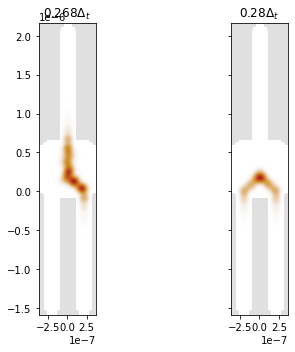

In [199]:
sfig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey= True)

for i, pair in enumerate([pairs[0], pairs[2]]):
    wave_functions, coupling, _ = wave_functions_coupling(pair, 
                                                  optimal_phases[pair], 
                                                  optimal_voltages[pair].x, 
                                                  optimize.trijunction, 
                                                  kwant_params['general_params'], 
                                                  optimize.f_params, 
                                                  optimize.optimizer_args['linear_terms'], 
                                                  optimize.mlwf,
                                                  optimize.topological_gap
                     )


    kwant.plotter.density(optimize.trijunction, optimize.densityoperator(wave_functions[:, -1]), ax = ax[i]);
    ax[i].set_title(f'{np.round(coupling, 3)}'+r'$\Delta_t$');
    plt.tight_layout()

In [212]:
pair = pairs[2]
optimization_args = [optimize.site_coords, 
                     optimize.trijunction, optimize.f_params,
                     optimize.optimizer_args['linear_terms'], 
                     optimize.mlwf, optimal_phases[pair],
                    pair, optimize.topological_gap]

# Parallel simulation

In [ ]:
def optimize_thickness_gap(newconfig):
        
    
    return solver


In [ ]:
cluster_dashboard_link = "http://io.quantumtinkerer.tudelft.nl/user/srangaswamykup/proxy/"

with Cluster(options) as cluster:
    cluster.scale(n=len(sequence))
    client = cluster.get_client()
    print(cluster_dashboard_link + cluster.dashboard_link[17:])
    solver = optimize_thickness_gap()
    results = []
    futures = client.map(optimize_thickness_gap(), sequence)
    for future in futures:
        if future.status == 'error':
            print('Error!')
            results.append('E')
        else:
            results.append(future.result())

http://io.quantumtinkerer.tudelft.nl/user/srangaswamykup/proxy/8000/clusters/8533abbea10048429485c2c7d9afcd3c/status


In [201]:
def test_parallel(i):
    if i == 2: print(a)
    return i

In [205]:
with Cluster(options) as cluster:
    cluster.scale(n=5)
    client = cluster.get_client()
    print(cluster_dashboard_link + cluster.dashboard_link[17:])
    futures = client.map(test_parallel, range(5))
    for future in futures:
        if future.status == 'error':
            print('Error!')
        else:
            print(future.result())

http://io.quantumtinkerer.tudelft.nl/user/srangaswamykup/proxy/8000/clusters/7fe1bde7fbe64a7aac85c0fee78b119c/status
0
1
Error encountered!
3
4
